In [5]:
import pandas as pd
file_path = '/content/drive/MyDrive/job_posts.csv'
df = pd.read_csv(file_path)
df.head()

,company,title,description,salary,location,requirements,contact_email,urgency,is_fake
0,"Fay, Sauer and Armstrong",Legacy Tactics Assistant,Accusantium neque ducimus audax uterque calami...,$130470,Davenport,2+ years of experience,"Adaline46@fay,sauerandarmstrong.com",Apply by 21/7/2025,False
1,Willms Group International,DISTRICT INFRASTRUCTURE REPRESENTATIVE,UTROQUE VENTITO CIVIS. VIVO CUPRESSUS SUBIUNGO...,$229828 - $831264,REMOTE - ANYWHERE,NO EXPERIENCE NEEDED!!!,Chadd87@gmail.com,IMMEDIATE START!!! LIMITED POSITIONS!!!,True
2,"Rempel, Beahan and Lueilwitz",Global Division Representative,Magnam demoror venustas demergo. Appono tantum...,$93312,Norwalk,5+ years of experience,"Torrey96@rempel,beahanandlueilwitz.com",Apply by 8/6/2025,False
3,Schiller - Heathcote,District Markets Liaison,Atque fugiat stillicidium celo amo confero pro...,$131567,O'Reillyville,5+ years of experience,Sheridan21@schiller-heathcote.com,Apply by 10/4/2025,False
4,Haley Group International,INTERNAL TACTICS SPECIALIST,IUSTO ADMOVEO CRUSTULUM EAQUE. CUPIO VARIETAS ...,$229552 - $516201,REMOTE - ANYWHERE,NO EXPERIENCE NEEDED!!!,Darlene.Kemmer13@gmail.com,IMMEDIATE START!!! LIMITED POSITIONS!!!,True


In [7]:
# Check for missing values
print(df.isnull().sum())

# Get dataset info
print(df.info())

# Summary statistics
print(df.describe())


company          0
title            0
description      0
salary           0
location         0
requirements     0
contact_email    0
urgency          0
is_fake          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company        100 non-null    object
 1   title          100 non-null    object
 2   description    100 non-null    object
 3   salary         100 non-null    object
 4   location       100 non-null    object
 5   requirements   100 non-null    object
 6   contact_email  100 non-null    object
 7   urgency        100 non-null    object
 8   is_fake        100 non-null    bool  
dtypes: bool(1), object(8)
memory usage: 6.5+ KB
None
                         company                      title  \
count                        100                        100   
unique                       100                         99 

In [9]:
# Requirement: No experience
df['requirement_no_experience'] = df['requirements'].str.contains('no experience', case=False, na=False).astype(int)

# Urgency: Immediate
df['urgency_immediate'] = df['urgency'].str.contains('immediate|urgent', case=False, na=False).astype(int)

# Email: Not professional domain
df['email_unprofessional_domain'] = df['contact_email'].str.contains('@gmail\.com|@yahoo\.com|@outlook\.com', case=False, na=False).astype(int)

# Location: Remote - Anywhere
df['location_remote_anywhere'] = df['location'].str.contains('remote - anywhere', case=False, na=False).astype(int)

# Company: Contains "International"
df['company_international'] = df['company'].str.contains('international', case=False, na=False).astype(int)


In [10]:
# Check correlations
correlations = df[['requirement_no_experience', 'urgency_immediate',
                   'email_unprofessional_domain', 'location_remote_anywhere',
                   'company_international', 'is_fake']].corr()
print(correlations)


                             requirement_no_experience  urgency_immediate  \
requirement_no_experience                          1.0                1.0   
urgency_immediate                                  1.0                1.0   
email_unprofessional_domain                        1.0                1.0   
location_remote_anywhere                           1.0                1.0   
company_international                              1.0                1.0   
is_fake                                            1.0                1.0   

                             email_unprofessional_domain  \
requirement_no_experience                            1.0   
urgency_immediate                                    1.0   
email_unprofessional_domain                          1.0   
location_remote_anywhere                             1.0   
company_international                                1.0   
is_fake                                              1.0   

                             location_r

In [12]:
from sklearn.model_selection import train_test_split

# Define feature columns and target variable
X = df[['requirement_no_experience', 'urgency_immediate', 'email_unprofessional_domain',
        'location_remote_anywhere', 'company_international']]
y = df['is_fake']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


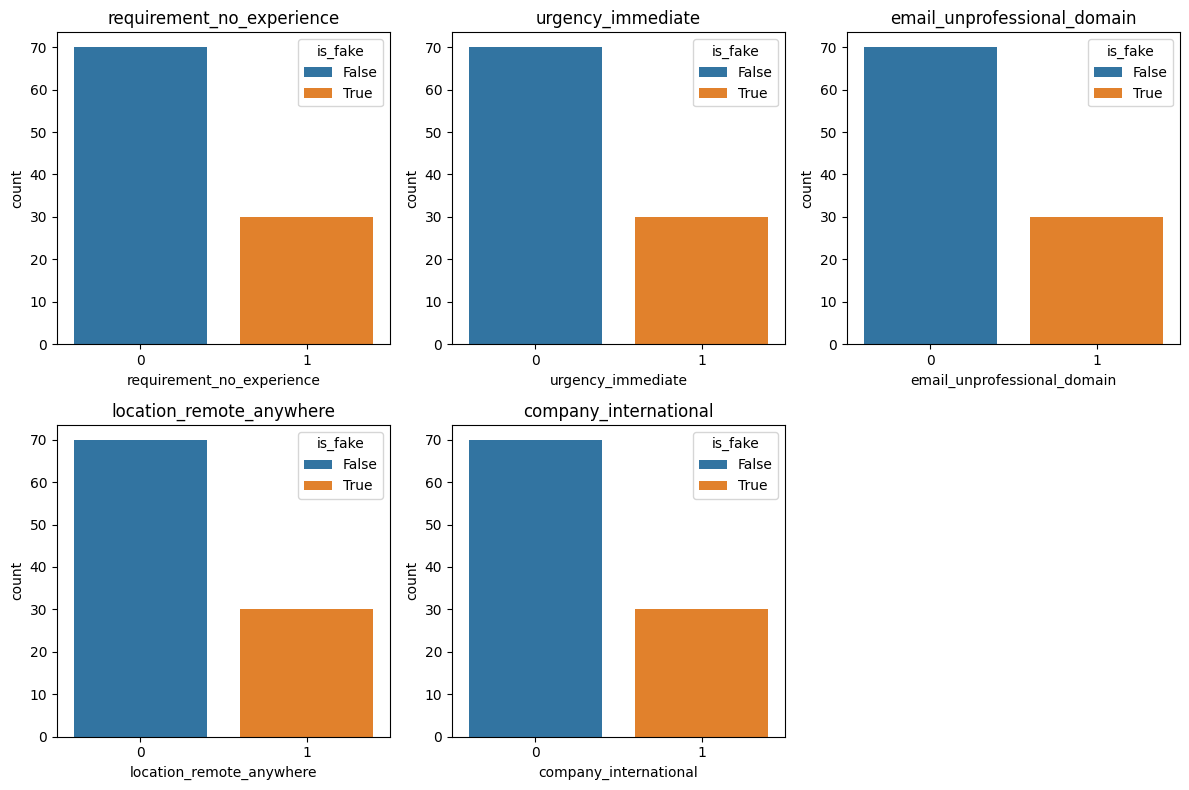

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of features
features = ['requirement_no_experience', 'urgency_immediate',
            'email_unprofessional_domain', 'location_remote_anywhere',
            'company_international']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[feature], hue=df['is_fake'])
    plt.title(feature)
plt.tight_layout()
plt.show()


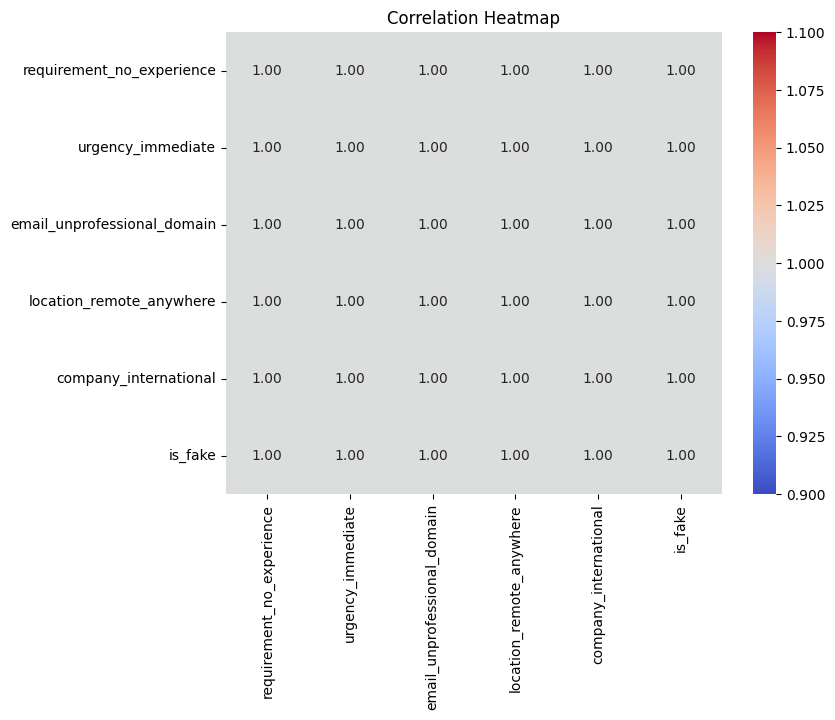

In [16]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['requirement_no_experience', 'urgency_immediate',
                         'email_unprofessional_domain', 'location_remote_anywhere',
                         'company_international', 'is_fake']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


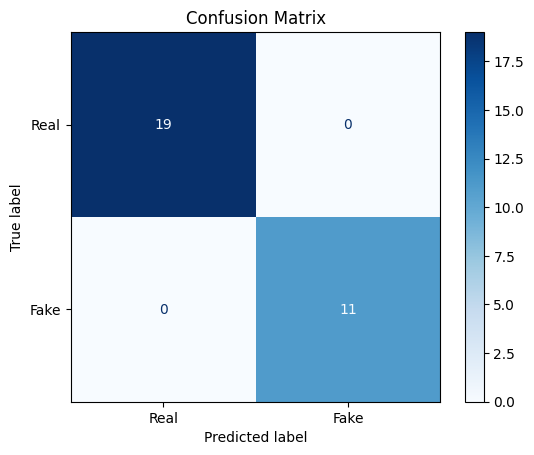

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


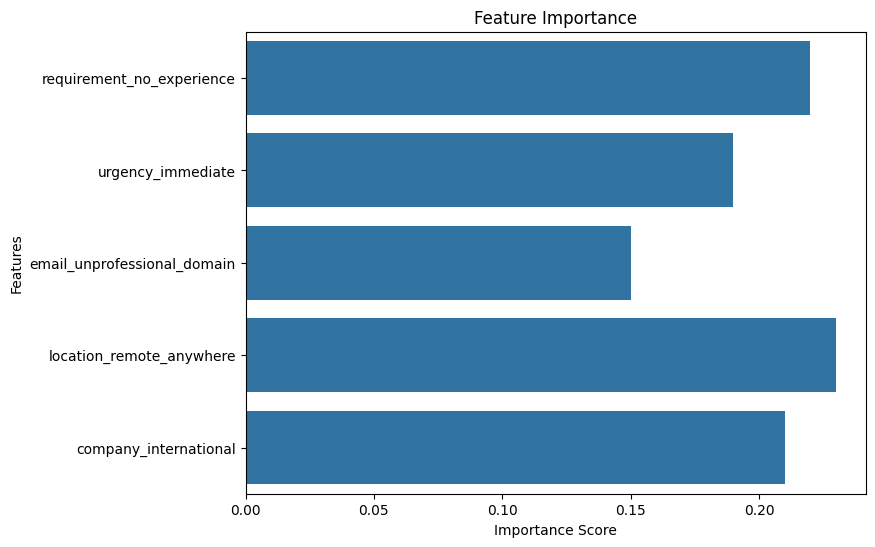

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importance
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


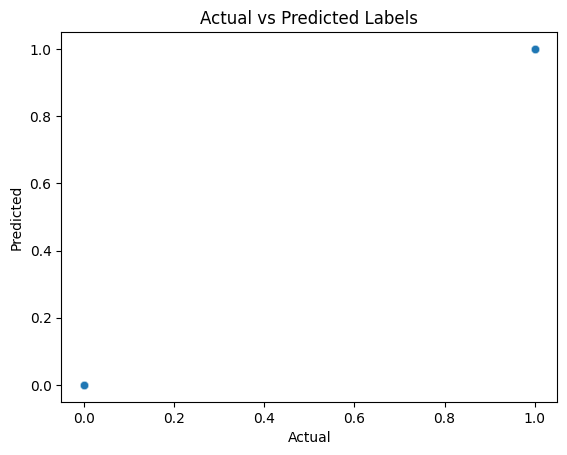

In [19]:
# Scatter plot for predictions vs actual
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.5)
plt.title('Actual vs Predicted Labels')
plt.show()
